In [1]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [2]:
img = cv2.imread('smile.jpg')

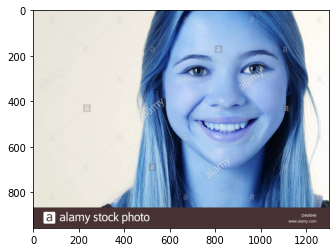

In [3]:
plt.imshow(img)  # BGR

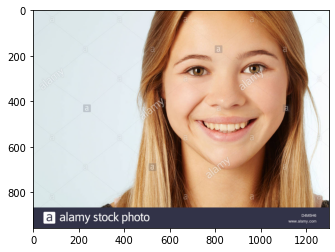

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]   


In [6]:
predictions

{'emotion': {'angry': 2.297359597916872e-09,
  'disgust': 3.4339235813846635e-17,
  'fear': 1.8843233644613093e-11,
  'happy': 99.10811792515302,
  'sad': 1.5717109072430916e-07,
  'surprise': 0.0030828039561408512,
  'neutral': 0.8887947408801626},
 'dominant_emotion': 'happy',
 'age': 25.715119290078114,
 'gender': 'Woman',
 'race': {'asian': 17.752034962177277,
  'indian': 3.1086385250091553,
  'black': 1.7332112416625023,
  'white': 32.7399879693985,
  'middle eastern': 10.629305243492126,
  'latino hispanic': 34.03683006763458},
 'dominant_race': 'latino hispanic'}

### Trying to draw a rectangle at face

In [7]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 3)

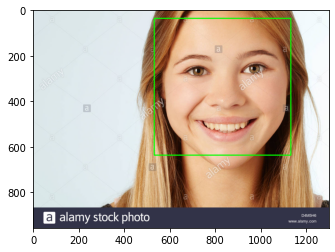

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 
            predictions['dominant_emotion'],
            (0,200),
            font, 5,
            (0,0,255),
            3,
            cv2.LINE_4) ;

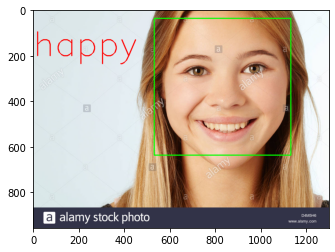

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
img_1 = cv2.imread('sad.png')

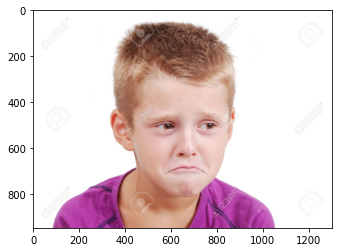

In [13]:
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

### work in progress

In [16]:
cap = cv2.VideoCapture(1)
# check if webcam is opened correctly 

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret,frame = cap.read() # read frame from a video
    faces = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor((frame, cv2.COLOR_BGR2GRAY))
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for(x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 3)
        
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(img, 
                predictions['dominant_emotion'],
                (0,200),
                font, 5,
                (0,0,255),
                3,
                cv2.LINE_4)
    cv2.imshow('Original Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    